# Homework 4: Visualization (50 points)

Please complete this notebook by filling in the cells provided.

The solved homework should be uploaded to Gradescope as an .ipynb file. DO NOT put your answers in more than one file or use a different file extension.

Make sure to RUN ALL CELLS IN YOUR NOTEBOOK before submitting. All of your answers should be printed and easy for graders to find if you want full credit for your work.


**Deadline**:

This assignment is due on **Friday, Feb 2 at 11:59pm.** Late work will not be accepted unless it follows the specific policy of your instructor.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck.


**Your graphs should be labeled with a title, x-label, and y-label and be otherwise readable. If these items are missing, points may be taken off.**


In [4]:
# Don't change this cell; just run it.

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 1. Colleges (20 points)


This exercise uses data on colleges. The dataset was posted on Kaggle at the beginning of 2018, and was grabbed from US-News: https://www.usnews.com. It includes statistics for 311 US Universities.

To make your tasks easier, we removed many of the columns and kept only 11.


#### Run the next cell that contains code that will allow you to read the data into a data frame called `colleges_df`. It also shows the first 10 rows.


In [5]:
# Just run this cell.

colleges_df=pd.read_csv('../data/colleges.csv')
colleges_df.head(10)

,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
5,33.0,1460.0,4524.0,8.0,95.0,58.0,20331.0,49892,Massachusetts Institute of Technology,5,private
6,31.0,1380.0,7034.0,5.0,95.0,47.0,19296.0,49617,Stanford University,5,private
7,32.0,1380.0,10019.0,9.0,93.0,47.0,25441.0,53534,University of Pennsylvania,8,private
8,31.0,1380.0,6609.0,11.0,92.0,41.0,23374.0,53744,Duke University,9,private
9,34.0,1510.0,979.0,8.0,91.0,51.0,23973.0,49908,California Institute of Technology,10,private


**Run the following command that will make a scatterplot of SAT average scores (x-axis) and tuition (y-axis).**

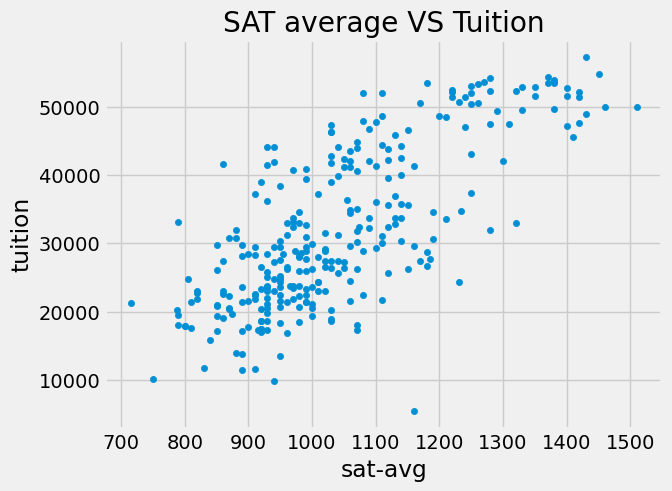

In [6]:
# run this cell
colleges_df.plot.scatter(x='sat-avg',y='tuition', title = 'SAT average VS Tuition');

**Question 1.**  (2 points) Describe in few words the pattern you see. What is a possible explanation for this pattern?

There is a positive correlation between tuition and SAT average (i.e. as University tuition increases, so does its average SAT score). This could be because universities with higher SAT score thresholds often have a reputation for academic rigor. Perhaps these institutions charge higher tuition fees because of the perceived value of their education.

**Question 2.** (4 points) Draw a barchart showing the average enrollment of private vs public colleges and then describe the pattern you see.(Note the bar chart should not include 'proprietary' schools.) Provide a possible explanation for this pattern.

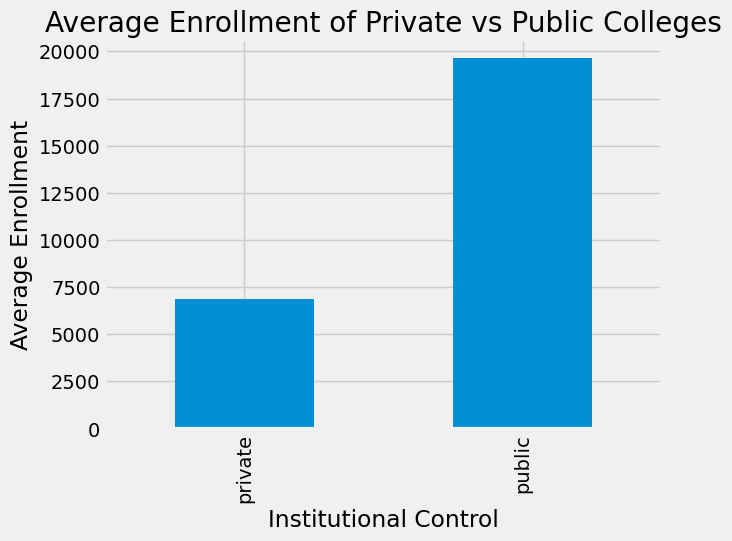

In [7]:
private_vs_public_enrollment = colleges_df.pivot_table(['enrollment'], index = 'institutionalControl', aggfunc = 'mean').reset_index().drop(1)
private_vs_public_enrollment.plot.bar(x = 'institutionalControl', y = 'enrollment', legend = False)

plt.xlabel('Institutional Control')
plt.ylabel('Average Enrollment')
plt.title('Average Enrollment of Private vs Public Colleges')

plt.show()


It seems that public institutions, on average, have a higher enrollment than private institutions. Perhaps this is because public institutions are funded by the state governments in which they're located, while private universities do not get state funding. Because of this, public universities have a larger endowment, to thus support the education of more students, than private institutions do.


**Question 3.** (2 points) Construct a data frame that contains the colleges for which `percent-receiving-aid` is greater than 0. Call this data frame `aid_df`.

Note that this dataset has missing data points (for example, not all colleges report the percentage of students who receive aid), and the table you created has eliminated the colleges with no information on aid.

In [8]:
aid_df = colleges_df.loc[colleges_df['percent-receiving-aid'] > 0]
aid_df



,act-avg,sat-avg,enrollment,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,tuition,displayName,overallRank,institutionalControl
0,32.0,1400.0,5400.0,7.0,100.0,60.0,16793.0,47140,Princeton University,1,private
1,32.0,1430.0,6710.0,5.0,98.0,55.0,16338.0,48949,Harvard University,2,private
2,32.0,1450.0,5941.0,8.0,96.0,42.0,27767.0,54825,University of Chicago,3,private
3,32.0,1420.0,5472.0,6.0,96.0,50.0,18385.0,51400,Yale University,3,private
4,32.0,1430.0,6113.0,6.0,95.0,48.0,21041.0,57208,Columbia University,5,private
...,...,...,...,...,...,...,...,...,...,...,...
145,22.0,990.0,25327.0,77.0,41.0,34.0,36636.0,29457,Oregon State University,145,public
146,22.0,970.0,2786.0,65.0,41.0,81.0,28750.0,33120,St. John Fisher College,145,private
147,21.0,990.0,17959.0,74.0,41.0,31.0,39033.0,27672,University of Illinois--Chicago,145,public
148,22.0,1000.0,19213.0,78.0,41.0,24.0,27943.0,23554,University of Mississippi,145,public


**Question 4.** (4 points) Using only the schools in the `aid_df` dataframe, draw a scatterplot showing the relationship between `percent-receiving-aid` and `cost-after-aid`. Describe any pattern you see, if one exists, and provide a possible explanation.

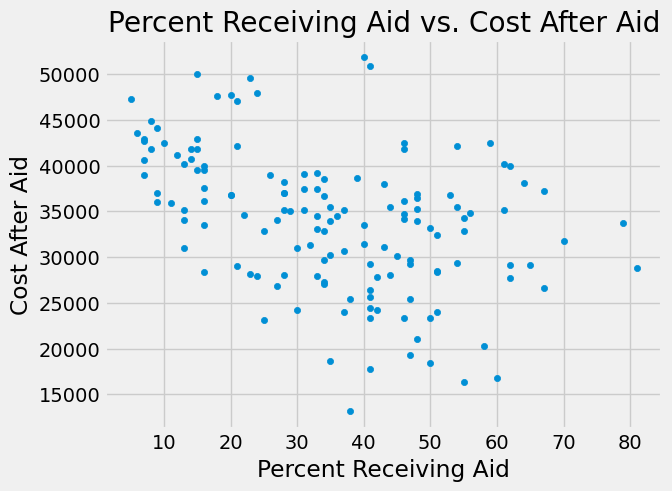

In [9]:
aid_df.plot.scatter('percent-receiving-aid', 'cost-after-aid', title = 'Percent Receiving Aid vs. Cost After Aid')

plt.ylabel('Cost After Aid')
plt.xlabel('Percent Receiving Aid')

plt.show()


It seems as if there is a general (not overly clear) negative correlation between the Percent Receiving Aid and Cost After Aid axes. That is to say, at least in this small sample, those institutions that seem to give the least financial aid charge the most after aid. This intuitively makes sense: those institutions that give the least amount of financial aid will necessary have a higher average cost after aid, by virtue of the fact that a comparitively high percentage of the students don't receive aid.

**Question 5.** (6 point) Construct a data frame with two rows (for private and public) and two columns: (i) first column should contain the strings 'public' and 'private'; (ii) second column should contain the percent of students receiving aid in that type of university. (Hint: these answers will not come from directly averaging the 'percent-receiving-aid' column)

In [10]:
public_receiving_aid = aid_df.loc[aid_df.institutionalControl == 'public']['percent-receiving-aid'].mean()
private_receiving_aid = aid_df.loc[aid_df.institutionalControl == 'private']['percent-receiving-aid'].mean()

aid_public_vs_private_df = pd.DataFrame({'institutionalControl': ['public', 'private'], 'percent-receiving-aid': 
                                        [public_receiving_aid, private_receiving_aid]})

aid_public_vs_private_df


,institutionalControl,percent-receiving-aid
0,public,23.013889
1,private,47.718310


**Question 6.**  (2 points) Make a bar chart that shows the aid information in the table you created for  Question 5.

**Note:** Graphs aren't very useful without accurate labels.  

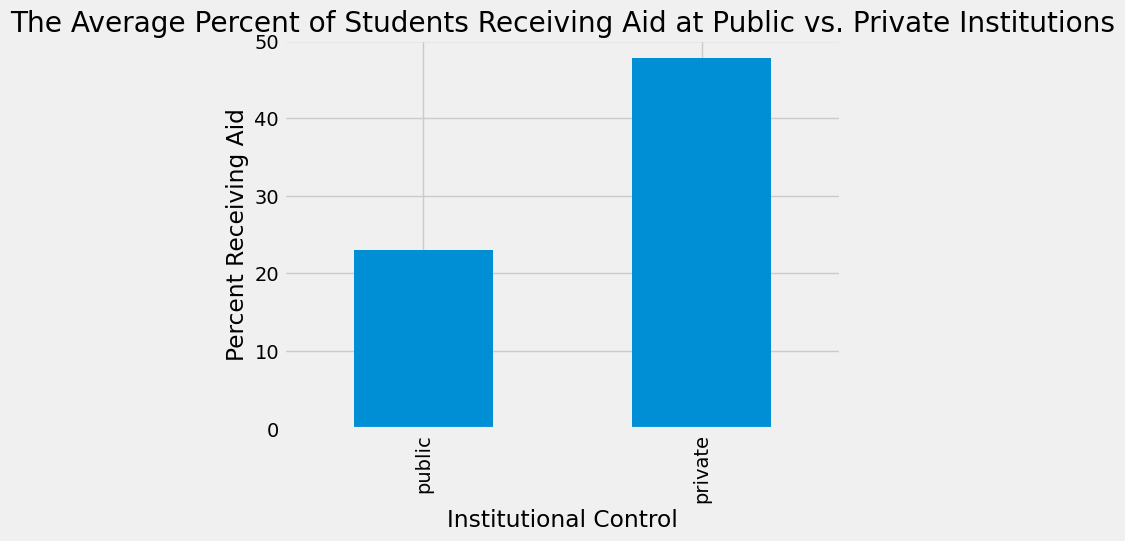

In [11]:
aid_public_vs_private_df.plot.bar(x = 'institutionalControl', y = 'percent-receiving-aid', legend = False)

plt.xlabel('Institutional Control')
plt.ylabel('Percent Receiving Aid')
plt.title('The Average Percent of Students Receiving Aid at Public vs. Private Institutions')

plt.show()


## 2. Seattle Public Library Circulation (24 points)
For this exercise we use a dataset, dating from **April of 2005** to **June 3, 2022**, of titles checked out at the Seattle Public Library. Since this dataset is voluminous, we have taken a random sample of 1/1000 of the data without replacement.   This dataset is distrubted from the Seattle Open Data Portal:
https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

You can read about the origin of the dataset Walsh, Melanie "Where is all the Book Data?"  2022-10-04  https://www.publicbooks.org/where-is-all-the-book-data/ at publicbooks.org.

In [32]:
spl_df= pd.read_csv("../data/Library_Checkouts.csv")
spl_df


,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,ISBN,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,VIDEODISC,2016,4,1,"JammX kids. Adventure one, Can't dance don't w...",NaN,NaN,"Dance parties Juvenile drama, Hip hop Juvenile...",Lightforce Entertainment ; Distributed by Warn...,2006.
1,Digital,Hoopla,TELEVISION,2016,4,2,Dogs Decoded,NaN,NaN,Science,PBS,NaN
2,Digital,OverDrive,EBOOK,2016,4,1,"Hunter's Oath: Sacred Hunt Series, Book 1",NaN,Michelle West,"Fantasy, Fiction","Penguin Group (USA), Inc.",2013
3,Physical,Horizon,SOUNDDISC,2016,4,2,Arkology [sound recording] / [Lee Scratch Perry].,NaN,"Perry, Lee, 1936-",Reggae music,"Island Jamaica,",p1997.
4,Digital,OverDrive,EBOOK,2016,4,1,The Art of Eating In: How I Learned to Stop Sp...,NaN,Cathy Erway,"Cooking & Food, Essays, Nonfiction","Penguin Group (USA), Inc.",2010
...,...,...,...,...,...,...,...,...,...,...,...,...
40991,Physical,Horizon,BOOK,2016,4,2,Storm siren / Mary Weber.,NaN,"Weber, Mary (Mary Christine)","Imaginary creatures Fiction, Magic Fiction, Sh...","Thomas Nelson,",[2014]
40992,Physical,Horizon,BOOK,2016,4,1,Show what you know on the MSP 8. Science : stu...,NaN,NaN,"Science Examinations Study guides, Washington ...","Show What You Know Publishing,",c2009.
40993,Physical,Horizon,VIDEODISC,2016,4,1,Sukai kurora [videorecording] = The sky crawle...,NaN,NaN,"Imaginary wars and battles Drama, Immortality ...","Sony Pictures Home Entertainment,",2009.
40994,Digital,OverDrive,EBOOK,2016,4,3,Take a Chance on Me: Christiansen Family Serie...,NaN,Susan May Warren,"Christian Fiction, Fiction, Romance",Tyndale House Publishers,2014


**Question 7** (6 points) Make two histograms. The first should show the distribution of times an item is checked out, include all items. (What's wrong with this graph?) The second should include only items with less than 25 checkouts to get a better look. Describe the distribution you see. Approximately what are the minimum and maximum values? Where do the majority of the values lie? Are there any unusual values?

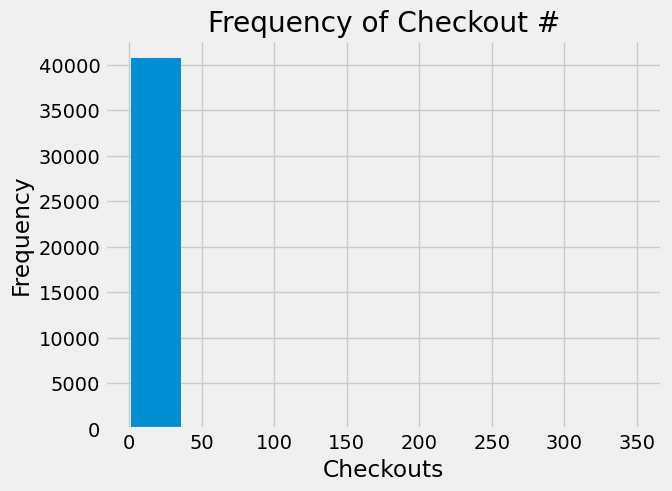

In [39]:
spl_df.hist('Checkouts')

plt.xlabel('Checkouts')
plt.ylabel('Frequency')
plt.title('Frequency of Checkout #')
plt.show()


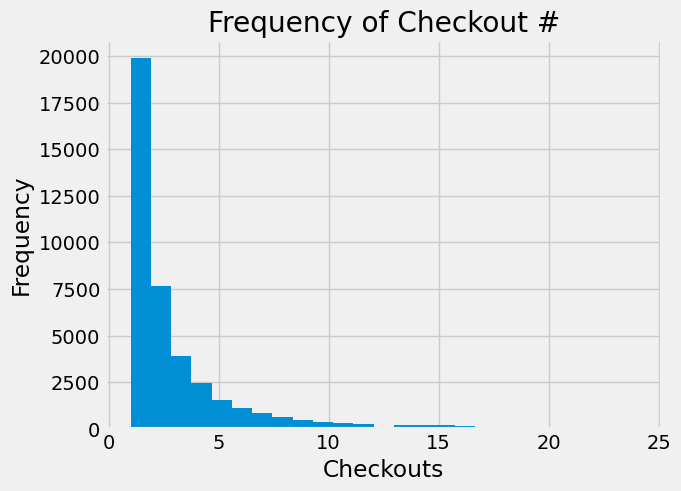

In [40]:
spl_df_less_than_25 = spl_df.loc[spl_df.Checkouts < 25]
spl_df_less_than_25.hist('Checkouts', bins = 25)

plt.xlabel('Checkouts')
plt.ylabel('Frequency')
plt.title('Frequency of Checkout #')

plt.show()

The first histogram doesn't show us much about the data set we're working with because it has broad bins. Essentially, all of the data points (they are all between 1 and 50 checkouts) are contained in one bin, so it's impossible to differentiate between them. In the second histogram, when we graph a smaller amount of data, it's easier to differentiate between different numbers of checkouts. In the second histogram, the max probably occurs at 1 checkout and the min probably occurs at some number between 15 and 25.

**Question 8** (5 points) Make a bar chart of the total number of checkouts by year.

Comment on the values in 2005, 2020, and 2022, considering how and when the data was collected. Is this the best way to depict this data? Why or why not?

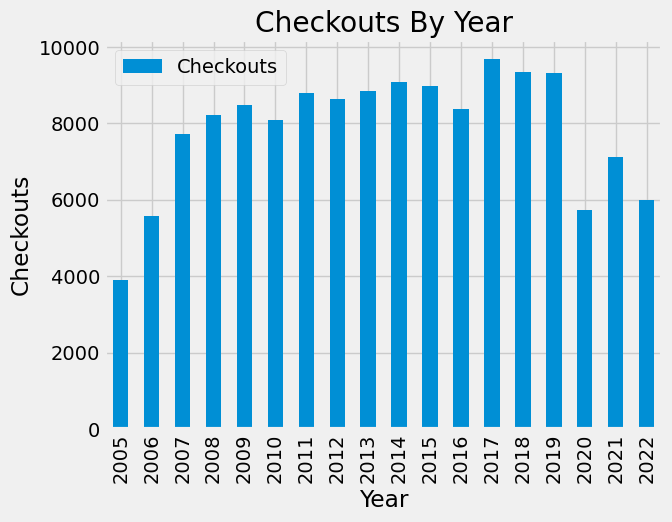

In [44]:
checkouts_by_year = spl_df.groupby('CheckoutYear').sum()[['Checkouts']].reset_index()
checkouts_by_year.plot.bar(x = 'CheckoutYear', y = 'Checkouts', title = 'Checkouts By Year')

plt.xlabel('Year')
plt.ylabel('Checkouts')
plt.title('Checkouts By Year')

plt.show()

The years 2005, 2020, and 2022 definitely do stick out as outliers in this dataset, although their status as outliers can all be pretty easily explained. So few books were checked out in 2020 because of COVID, I could only assume. 2005 and 2022, on the other hand, are so low because the data set cuts both of them in half (i.e. data collection starts in mid 2005 and ends in mid 2022). However, besides the maybe misleading outliers in 2005 and 2022 (I would not consider 2020 a misleading outlier), I still think a bar graph is a very good way to display this data.

**Question 9** (6 points) How did the pandemic interact with long-term trends in library / media
consumption?  Using the data in the column `UsageClass` make a line graph plot that has two line trends, one for "DIGITAL" and one for "PHYSICAL". Comment on the trends you see in the graph.

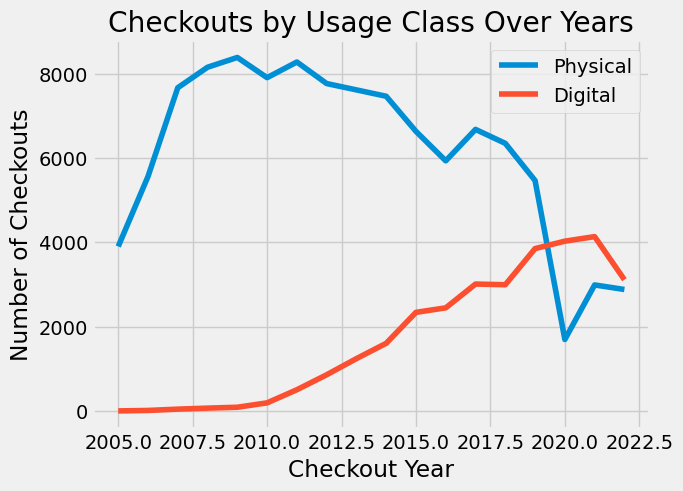

In [61]:
usage_class_df = spl_df.pivot_table(values = 'Checkouts', index = 'CheckoutYear', columns = 'UsageClass', aggfunc = 'sum').reset_index()

plt.plot(usage_class_df['CheckoutYear'], usage_class_df['Physical'], label='Physical')
plt.plot(usage_class_df['CheckoutYear'], usage_class_df['Digital'], label='Digital')

plt.xlabel('Checkout Year')
plt.ylabel('Number of Checkouts')
plt.title('Checkouts by Usage Class Over Years')

plt.legend()

plt.show()

Since 2005, Physical book checkouts stayed at a pretty consistent value (pretty high) until around 2020, when they spiked downwards. Since 2020, Physical checkouts have made a bit of a comeback, although not a significant one. They have not come close to reaching the heights of before COVID. On the other hand, Digital checkouts had been consistently increasing since 2005 and reached their peak in 2020. Since then, though, they have moderately decreased.


**Question 10** (6 points) We would like to see if there is some clarification on the trends in Question 9 that come from the data in column `MaterialType`. Make a line graph comparing BOOK and AUDIOBOOK checkouts and comment on the general trends in the graph.

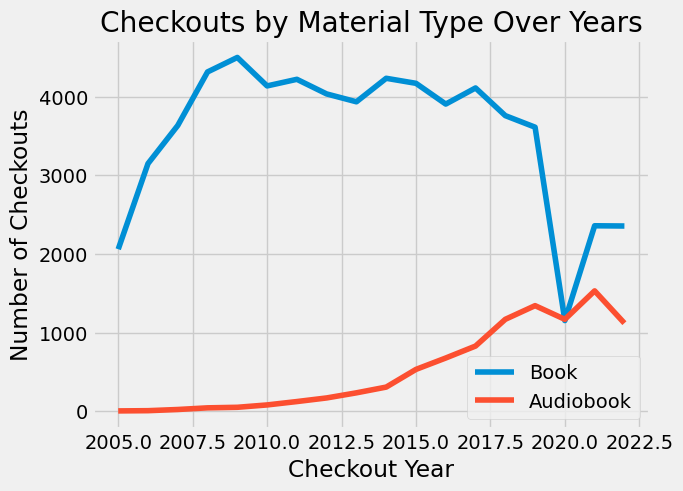

In [65]:
material_type_df = spl_df.pivot_table(values = 'Checkouts', index = 'CheckoutYear', columns = 'MaterialType', aggfunc = 'sum').reset_index()[['CheckoutYear', 'BOOK', 'AUDIOBOOK']]

plt.plot(material_type_df['CheckoutYear'], material_type_df['BOOK'], label='Book')
plt.plot(material_type_df['CheckoutYear'], material_type_df['AUDIOBOOK'], label='Audiobook')

plt.xlabel('Checkout Year')
plt.ylabel('Number of Checkouts')
plt.title('Checkouts by Material Type Over Years')

plt.legend()

plt.show()



Physical Book checkouts increased starting in 2005 to peak in around 2009. They were at a pretty constant mark until 2020, when they spiked downwards. They have made a bit of a resurgence since 2020 but have not reached their original heights. Audiobook checkouts steadily increased until decreasing a bit during COVID. Interestingly enough, though, they surpassed their original heights after the period of COVID lockdowns.


**Question 11** (1 points) Is a line graph a good option here? Write a sentence explanation of why or why not.

I think a line graph is a good option here. It does a good job of visually depicting the temporal trends/patterns involved in each differing dataset.

## 3. Misleading Graphs (6 points)

**Question 12** (2 points) The following graph was made by the Florida Department of Law Enforcement. What was the intended message, the graph was trying to convey? In what way(s) is the graph incorrect or misleading?

<img width=500 src="https://github.com/amandakube/Data118LectureImages/blob/main/Screenshot%202023-10-19%20at%201.57.33%20PM.png?raw=true">


The intended message the graph was trying to convey was that murders committed using firearms significantly incerased after Florida enacted its 'Stand Your Ground' law. It does a poor job of representing this for a couple of reasons. First of all, the graph is upside down (i.e. larger values approach the bottom of the graph and vice versa). Also, there are no labels for the x and y axes and the x axis scale is very non-specific.



**Question 13**  (1 points) Consider this graph showcasing both sales and profits for a hypothetical business. Explain why it might be useful to graph these two things on the same graph despite the fact they are expressed in different units.

<img width=800 src="https://github.com/btrok/lecture-materials/blob/main/sales vs profits.png?raw=true">

Even though they are expressed in different units, it is still valuable to plot profits and sales on the same graph in order to measure efficiency. If the profits line is way above the sales bar, that is a sign that revenue is coming from more than one source.

 **Question 14** (3 points)
Consider the following graph. Explain why the dual $y$-axis might be ok in the previous example but not ok here.  What message might this graph be trying to convey? In what way(s) is the graph incorrect or misleading?

<img width=1000 src="https://github.com/btrok/lecture-materials/blob/main/military_spending.webp?raw=true">

The dual y-axis is problematic here because they express the same units, they are just scaled differently. In this case, all countries except the U.S. are plotted according to the left y-axis, which depicts a lesser scale of values than the right y-axis. This graph is purposefully constructed to make it seem like the US has less money than it really does compared to the other five countries.